In [23]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
from datetime import datetime
import requests
from config import weather_api_key
import time
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

628

In [2]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3a0ba330c1a35fe48f61add10f66ffea


In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | marsa matruh
Processing Record 2 of Set 1 | khatanga
Processing Record 3 of Set 1 | codrington
Processing Record 4 of Set 1 | banjar
Processing Record 5 of Set 1 | bilibino
Processing Record 6 of Set 1 | atuona
Processing Record 7 of Set 1 | cap-aux-meules
Processing Record 8 of Set 1 | kurtalan
Processing Record 9 of Set 1 | mocuba
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | clinton
Processing Record 12 of Set 1 | mocajuba
Processing Record 13 of Set 1 | havelock
Processing Record 14 of Set 1 | dhidhdhoo
Processing Record 15 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 16 of Set 1 | mataura
Processing Record 17 of Set 1 | puerto ayora
Processing Record 18 of Set 1 | tuatapere
Processing Record 19 of Set 1 | bengkulu
Processing Record 20 of Set 1 | hervey bay
Processing Record 21 of Set 1 | ushuaia
Processing Record 22 of Set 1 | new norfolk
Proce

Processing Record 38 of Set 4 | fukue
Processing Record 39 of Set 4 | cagayan de tawi-tawi
City not found. Skipping...
Processing Record 40 of Set 4 | yashkul
Processing Record 41 of Set 4 | poso
Processing Record 42 of Set 4 | barranca
Processing Record 43 of Set 4 | kodiak
Processing Record 44 of Set 4 | wanaka
Processing Record 45 of Set 4 | pak phanang
Processing Record 46 of Set 4 | fairmont
Processing Record 47 of Set 4 | rocha
Processing Record 48 of Set 4 | buchanan
Processing Record 49 of Set 4 | suntar
Processing Record 50 of Set 4 | dhamrai
Processing Record 1 of Set 5 | kourou
Processing Record 2 of Set 5 | hirara
Processing Record 3 of Set 5 | novo cruzeiro
Processing Record 4 of Set 5 | katobu
Processing Record 5 of Set 5 | esperance
Processing Record 6 of Set 5 | ilinskiy
Processing Record 7 of Set 5 | korla
Processing Record 8 of Set 5 | fortuna
Processing Record 9 of Set 5 | gushikawa
Processing Record 10 of Set 5 | kalmunai
Processing Record 11 of Set 5 | karangasem
P

Processing Record 29 of Set 8 | uwajima
Processing Record 30 of Set 8 | vestbygda
City not found. Skipping...
Processing Record 31 of Set 8 | husavik
Processing Record 32 of Set 8 | botwood
Processing Record 33 of Set 8 | lorengau
Processing Record 34 of Set 8 | ostrovnoy
Processing Record 35 of Set 8 | sao filipe
Processing Record 36 of Set 8 | olafsvik
Processing Record 37 of Set 8 | sarakhs
Processing Record 38 of Set 8 | cervo
Processing Record 39 of Set 8 | mayumba
Processing Record 40 of Set 8 | mormugao
Processing Record 41 of Set 8 | puerto del rosario
Processing Record 42 of Set 8 | flin flon
Processing Record 43 of Set 8 | kirakira
Processing Record 44 of Set 8 | kambove
Processing Record 45 of Set 8 | morant bay
Processing Record 46 of Set 8 | ilulissat
Processing Record 47 of Set 8 | vostok
Processing Record 48 of Set 8 | sweetwater
Processing Record 49 of Set 8 | yenagoa
Processing Record 50 of Set 8 | tessalit
Processing Record 1 of Set 9 | marcona
City not found. Skippin

Processing Record 16 of Set 12 | ormara
Processing Record 17 of Set 12 | tabiauea
City not found. Skipping...
Processing Record 18 of Set 12 | la ronge
Processing Record 19 of Set 12 | toora-khem
Processing Record 20 of Set 12 | coahuayana
Processing Record 21 of Set 12 | waipawa
Processing Record 22 of Set 12 | acajutla
Processing Record 23 of Set 12 | ngukurr
City not found. Skipping...
Processing Record 24 of Set 12 | van wert
Processing Record 25 of Set 12 | ahipara
Processing Record 26 of Set 12 | pangai
Processing Record 27 of Set 12 | soyo
Processing Record 28 of Set 12 | newport
Processing Record 29 of Set 12 | sorong
Processing Record 30 of Set 12 | ixtapa
Processing Record 31 of Set 12 | hihifo
City not found. Skipping...
Processing Record 32 of Set 12 | kysyl-syr
Processing Record 33 of Set 12 | vilyuysk
Processing Record 34 of Set 12 | muncar
Processing Record 35 of Set 12 | nizhneshilovka
City not found. Skipping...
Processing Record 36 of Set 12 | yelatma
Processing Recor

In [7]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Marsa Matruh,31.35,27.25,71.60,78,40,8.05,EG,2020-06-24 22:17:00
1,Khatanga,71.97,102.50,71.85,55,100,10.27,RU,2020-06-24 22:14:24
2,Codrington,-38.27,141.97,45.73,92,0,12.30,AU,2020-06-24 22:14:20
3,Banjar,-8.19,114.97,77.00,100,40,4.70,ID,2020-06-24 22:17:00
4,Bilibino,68.05,166.44,54.88,41,31,3.33,RU,2020-06-24 22:17:00
5,Atuona,-9.80,-139.03,79.20,69,35,14.79,PF,2020-06-24 22:17:01
6,Cap-Aux-Meules,47.38,-61.86,73.40,73,5,14.99,CA,2020-06-24 22:14:26
7,Kurtalan,37.93,41.70,60.80,72,0,4.70,TR,2020-06-24 22:17:01
8,Mocuba,-16.84,36.99,62.74,98,5,3.11,MZ,2020-06-24 22:17:01
9,Rikitea,-23.12,-134.97,70.59,55,97,9.80,PF,2020-06-24 22:15:00


In [10]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Marsa Matruh,EG,2020-06-24 22:17:00,31.35,27.25,71.60,78,40,8.05
1,Khatanga,RU,2020-06-24 22:14:24,71.97,102.50,71.85,55,100,10.27
2,Codrington,AU,2020-06-24 22:14:20,-38.27,141.97,45.73,92,0,12.30
3,Banjar,ID,2020-06-24 22:17:00,-8.19,114.97,77.00,100,40,4.70
4,Bilibino,RU,2020-06-24 22:17:00,68.05,166.44,54.88,41,31,3.33
5,Atuona,PF,2020-06-24 22:17:01,-9.80,-139.03,79.20,69,35,14.79
6,Cap-Aux-Meules,CA,2020-06-24 22:14:26,47.38,-61.86,73.40,73,5,14.99
7,Kurtalan,TR,2020-06-24 22:17:01,37.93,41.70,60.80,72,0,4.70
8,Mocuba,MZ,2020-06-24 22:17:01,-16.84,36.99,62.74,98,5,3.11
9,Rikitea,PF,2020-06-24 22:15:00,-23.12,-134.97,70.59,55,97,9.80


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

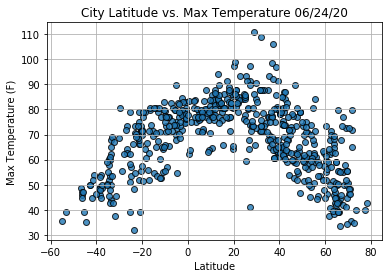

In [15]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

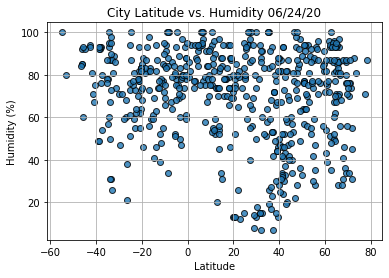

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

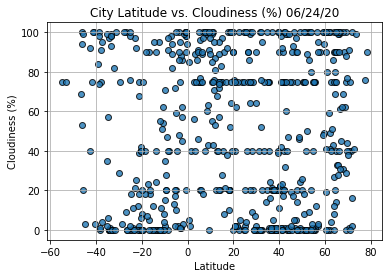

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

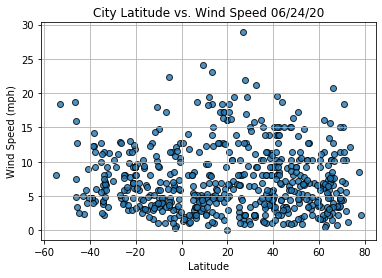

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [29]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [30]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

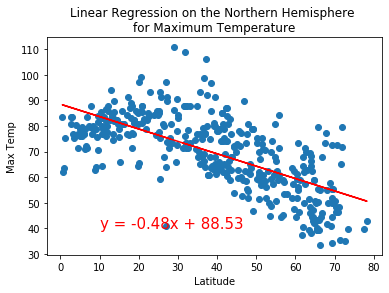

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Maximum Temperature', 'Max Temp',(10,40))

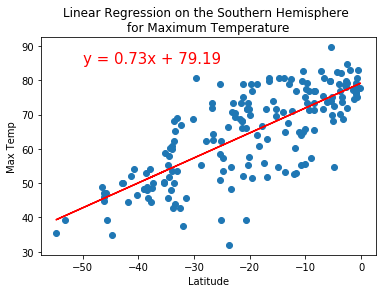

In [39]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Maximum Temperature', 'Max Temp',(-50,85))

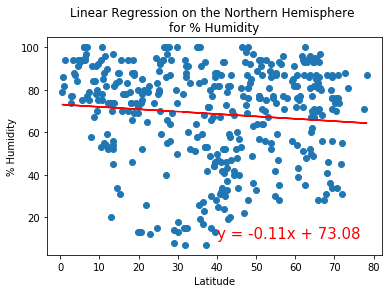

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Humidity', '% Humidity',(40,10))

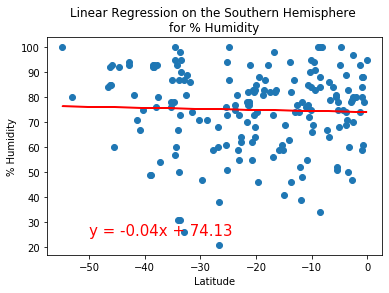

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Humidity', '% Humidity',(-50,25))

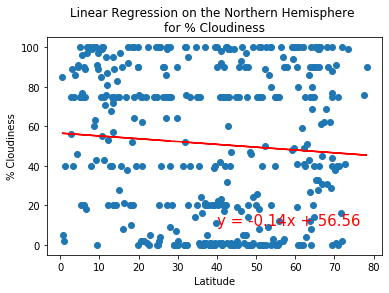

In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Cloudiness', '% Cloudiness',(40,10))

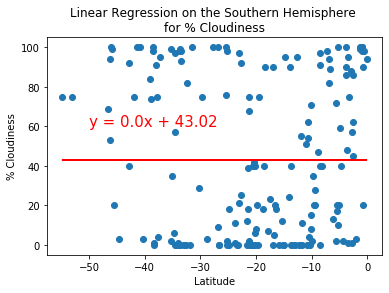

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Cloudiness', '% Cloudiness',(-50,60))

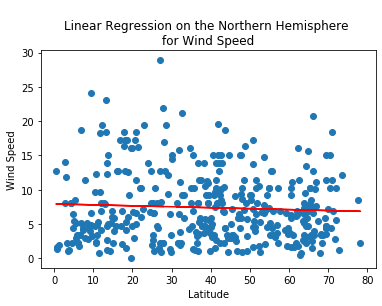

In [43]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 'Wind Speed',(40,35))

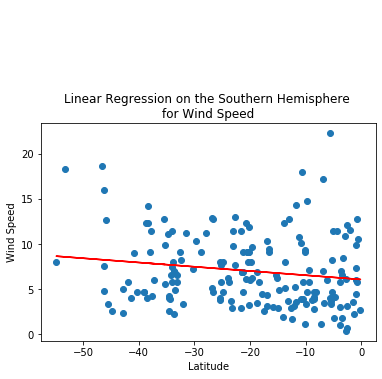

In [45]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Wind Speed', 'Wind Speed',(-50,35))